In [1]:
import pyts
print(pyts.__version__)

0.12.0


[[-0.6478854  -0.64199155 -0.63818632 ... -0.64042873 -0.63866571
  -0.63865722]
 [-0.64442658 -0.64540093 -0.64705511 ... -0.6349345  -0.6344968
  -0.63159565]
 [-0.77835282 -0.77827907 -0.77715084 ... -0.70419626 -0.70760524
  -0.7071202 ]
 ...
 [-0.77912617 -0.77837863 -0.7757449  ... -0.50500603 -0.50373099
  -0.50438486]
 [-0.70303339 -0.70261754 -0.70250356 ... -0.64113375 -0.64140622
  -0.64210896]
 [-1.4357199  -1.4322717  -1.4329285  ... -1.4354619  -1.4352821
  -1.4308845 ]]
(50, 150)


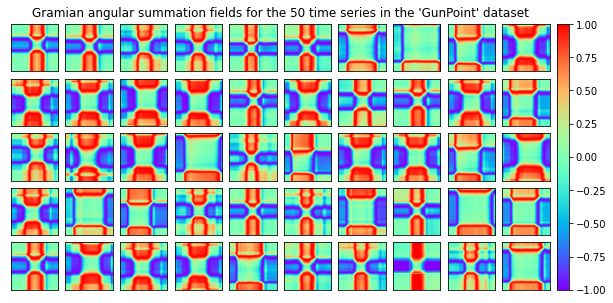

In [5]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

# Load the GunPoint dataset
X, Y, _, _ = load_gunpoint(return_X_y=True)

print(X)
print(X.shape)

# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField(method='difference')
X_gaf = gaf.fit_transform(X)


# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True, cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields for the 50 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()

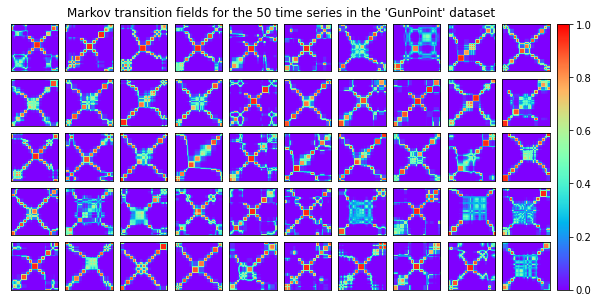

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint

# Load the GunPoint dataset
X, _, _, _ = load_gunpoint(return_X_y=True)

# Get the recurrence plots for all the time series
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_mtf[i], cmap='rainbow', origin='lower', vmin=0., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Markov transition fields for the 50 time series in the "
             "'GunPoint' dataset", y=0.92)

plt.show()

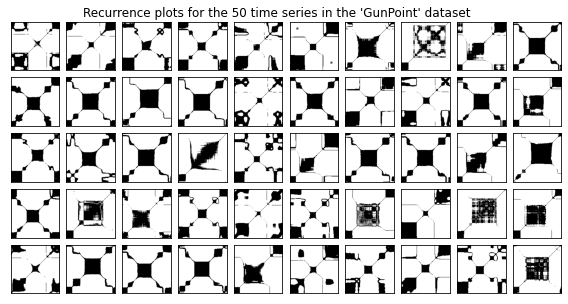

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

# Load the GunPoint dataset
X, _, _, _ = load_gunpoint(return_X_y=True)

# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)

# Plot the 50 recurrence plots
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True)
for i, ax in enumerate(grid):
    ax.imshow(X_rp[i], cmap='binary', origin='lower')
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])

fig.suptitle(
    "Recurrence plots for the 50 time series in the 'GunPoint' dataset",
    y=0.92
)

plt.show()

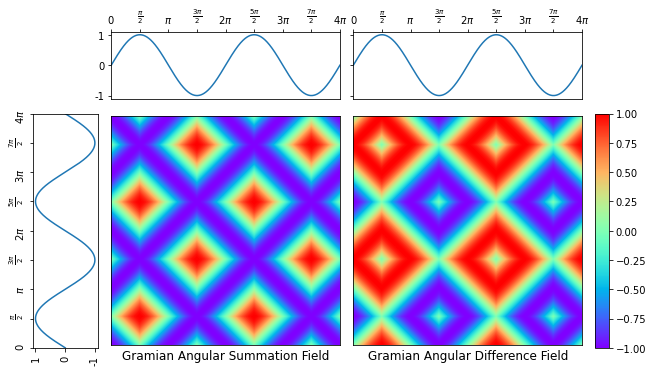

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Compute Gramian angular fields
gasf = GramianAngularField(method='summation')
X_gasf = gasf.fit_transform(X)

gadf = GramianAngularField(method='difference')
X_gadf = gadf.fit_transform(X)

# Plot the time series and its recurrence plot
width_ratios = (2, 7, 7, 0.4)
height_ratios = (2, 7)
width = 10
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 4,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.1, hspace=0.1)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top1 = fig.add_subplot(gs[0, 1])
ax_top2 = fig.add_subplot(gs[0, 2])
for ax in (ax_top1, ax_top2):
    ax.plot(time_points, x)
    ax.set_xticks(time_ticks)
    ax.set_xticklabels(time_ticklabels)
    ax.set_yticks(value_ticks)
    ax.xaxis.tick_top()
    ax.set_xlim((0, 4 * np.pi))
ax_top1.set_yticklabels(value_ticks)
ax_top2.set_yticklabels([])

# Plot the Gramian angular fields on the bottom right
ax_gasf = fig.add_subplot(gs[1, 1])
ax_gasf.imshow(X_gasf[0], cmap='rainbow', origin='lower',
               extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gasf.set_xticks([])
ax_gasf.set_yticks([])
ax_gasf.set_title('Gramian Angular Summation Field', y=-0.09)

ax_gadf = fig.add_subplot(gs[1, 2])
im = ax_gadf.imshow(X_gadf[0], cmap='rainbow', origin='lower',
                    extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_gadf.set_xticks([])
ax_gadf.set_yticks([])
ax_gadf.set_title('Gramian Angular Difference Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 3])
fig.colorbar(im, cax=ax_cbar)

plt.show()

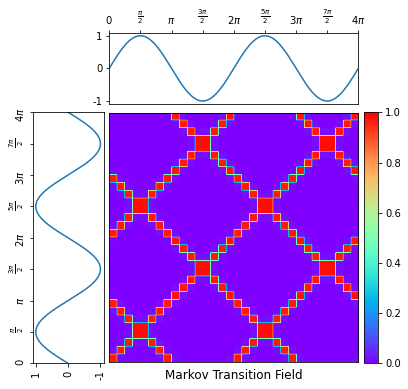

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Compute Gramian angular fields
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

# Plot the time series and its Markov transition field
width_ratios = (2, 7, 0.4)
height_ratios = (2, 7)
width = 6
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 3,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.set_ylim((0, 4 * np.pi))
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()
ax_top.set_xlim((0, 4 * np.pi))
ax_top.set_yticklabels(value_ticks)

# Plot the Gramian angular fields on the bottom right
ax_mtf = fig.add_subplot(gs[1, 1])
im = ax_mtf.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.,
                   extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_mtf.set_xticks([])
ax_mtf.set_yticks([])
ax_mtf.set_title('Markov Transition Field', y=-0.09)

# Add colorbar
ax_cbar = fig.add_subplot(gs[1, 2])
fig.colorbar(im, cax=ax_cbar)

plt.show()

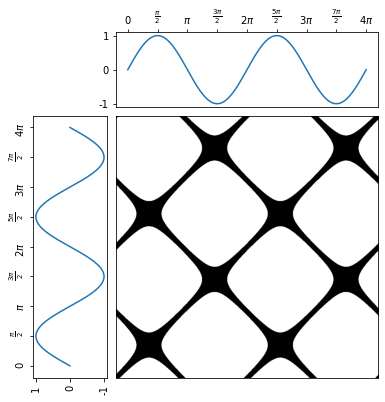

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot


# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

# Recurrence plot transformation
rp = RecurrencePlot(threshold=np.pi/18)
X_rp = rp.transform(X)

# Plot the time series and its recurrence plot
fig = plt.figure(figsize=(6, 6))

gs = fig.add_gridspec(2, 2,  width_ratios=(2, 7), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# Define the ticks and their labels for both axes
time_ticks = np.linspace(0, 4 * np.pi, 9)
time_ticklabels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$',
                   r'$\frac{3\pi}{2}$', r'$2\pi$', r'$\frac{5\pi}{2}$',
                   r'$3\pi$', r'$\frac{7\pi}{2}$', r'$4\pi$']
value_ticks = [-1, 0, 1]
reversed_value_ticks = value_ticks[::-1]

# Plot the time series on the left with inverted axes
ax_left = fig.add_subplot(gs[1, 0])
ax_left.plot(x, time_points)
ax_left.set_xticks(reversed_value_ticks)
ax_left.set_xticklabels(reversed_value_ticks, rotation=90)
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels, rotation=90)
ax_left.invert_xaxis()

# Plot the time series on the top
ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(time_points, x)
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_yticks(value_ticks)
ax_top.set_yticklabels(value_ticks)
ax_top.xaxis.tick_top()

# Plot the recurrence plot on the bottom right
ax_rp = fig.add_subplot(gs[1, 1])
ax_rp.imshow(X_rp[0], cmap='binary', origin='lower',
             extent=[0, 4 * np.pi, 0, 4 * np.pi])
ax_rp.set_xticks([])
ax_rp.set_yticks([])

plt.show()